In [1]:
    from uncertain_panda import pandas as pd
    import numpy as np
    import requests
    from bs4 import BeautifulSoup
    import matplotlib.pyplot as plt

In [2]:
# my web to have information
# https://www.kaggle.com/nicholasjhana/energy-consumption-generation-prices-and-weather#energy_dataset.csv

# my web to have web scraping


In [3]:
data = pd.read_csv ("./input/energy_dataset.csv")
data.shape

(35064, 29)

In [4]:
# Checking empty columns
data.isnull().any().sum()

23

In [5]:
#data.isnull().sum()

In [6]:
# lets remove empty columns
null_cols = data.isnull().sum()
null_cols[null_cols > 0]

generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                                  18
generation waste                              

In [7]:
drop_cols = list(null_cols[null_cols > 35000].index)
data_clean1 = data.drop(drop_cols, axis=1)
#display(data_clean1)

In [8]:
#data_clean1.isnull().sum()

In [9]:
col_names=[]
[col_names.append(e) for e in data_clean1]
#print(col_names)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
# 1st project. 
# Get the mean of pricings per day.
# get the mean per year
# web scraping to relate with the average incomes

economics = data_clean1[["time","price day ahead", "price actual"]].copy()
#display(Economics)

year=[]
[year.append(int(e[0:4])) for e in economics["time"]]
 
economics["year"]=year
economics=economics.drop("time",axis=1)
    
economics["price day ahead"] = economics["price day ahead"].astype(int)
economics["price actual"] = economics["price actual"].astype(int)

#display(economics)

In [11]:
economics_values=economics.groupby("year")["price day ahead","price actual"].mean()
#display(economics_values)

In [12]:
economics_error=economics.groupby("year")["price day ahead","price actual"].unc.mean()

In [13]:
newnames=economics_error.rename(columns={"price day ahead":"uncertainty ahead", "price actual":"uncertainty actual"})

In [14]:
eco=economics_values.join(newnames)

# Web scraping

In [15]:
url="https://datosmacro.expansion.com/mercado-laboral/salario-medio/espana"

In [16]:
res = requests.get(url)
html = res.text
html[:20]
salary = BeautifulSoup(html, 'html.parser')

In [17]:
repos = salary.select('tr')

In [18]:
year=[]

for x in repos[1:5]:
    for i in x:
        i=str(i)
#        print(i)
#        print(len(i))
        year.append(i)

In [19]:
dates=[]
incomes=[]
for x in year[0::3]:
    dates.append(x[-9:-5])
for x in year[1::3]:
    incomes.append(x[-12:-6])
spain=pd.DataFrame(dates,incomes)
#display(spain)
# performing this print(dates,incomes) we realised the order of our lists. so lets reverse it

In [20]:
eco["average income"]=incomes[::-1]

In [21]:
ordered_dataset=eco[["average income", "price day ahead", "price actual","uncertainty ahead","uncertainty actual"]]

In [22]:
display(ordered_dataset)

,average income,price day ahead,price actual,uncertainty ahead,uncertainty actual
year,,,,,
2015,26.475,49.917352,60.870320,49.92+/-0.13,60.87+/-0.13
2016,26.449,39.249886,46.945583,39.25+/-0.16,46.95+/-0.15
2017,26.550,51.788470,58.830708,51.79+/-0.13,58.83+/-0.13
2018,26.923,56.856050,62.944292,56.86+/-0.14,62.94+/-0.13


In [23]:
def decimals(data):

    for x in data.columns[0:3]:
        data["{}".format(x)]=data["{}".format(x)].astype(float)

In [33]:
def results(a,b=None):
        
    if b==None:
        if a not in ordered_dataset.columns:
            a=input("Please, insert a valid column name for 1st input: ")
            
        if a in ordered_dataset.columns[0:3]:
            plt.plot(ordered_dataset.index,ordered_dataset[a])
            plt.xlabel("years")
            plt.ylabel(a)
            return plt.show()
        else:
            return ordered_dataset[a]
        
    else:
        if a not in ordered_dataset.columns:
            a=input("Please, insert a valid column name for the 1st input: ")
        if b not in ordered_dataset.columns:
            b=input("Please, insert a valid column name for the 2nd input: ")
        
        if a in ordered_dataset.columns[0:3] and b in ordered_dataset.columns[0:3]:
            plt.plot(ordered_dataset.index,ordered_dataset[a], ordered_dataset.index, ordered_dataset[b])
            plt.xlabel("years")
            plt.ylabel("Blue 1st input, orange 2nd input")
            return plt.show()
        
        else:
            return "To perform multiple plotting you must the first 3 columns avaliables"

In [34]:
names=[]
for e in ordered_dataset:
    names.append(e)
names  

['average income',
 'price day ahead',
 'price actual',
 'uncertainty ahead',
 'uncertainty actual']

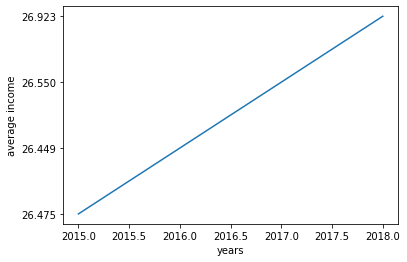

In [35]:
results("average income")

Please, insert a valid column name for the 1st input:  average income


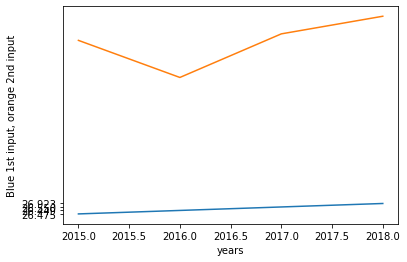

In [36]:
results("arevage income","price day ahead")

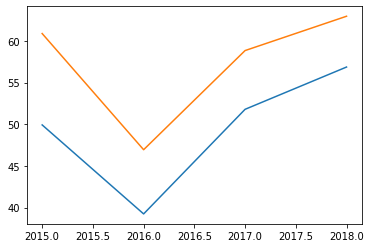

In [29]:
results("price day ahead", "price actual")

In [37]:
results("uncertainty actual")

year
2015    60.87+/-0.13
2016    46.95+/-0.15
2017    58.83+/-0.13
2018    62.94+/-0.13
Name: uncertainty actual, dtype: object

In [29]:
            
            
        
'''            
    else:
        if a not in ordered_dataset.columns:
        a=input("Please, insert a valid column name for 1st input: ")
    if b not in ordered_dataset.columns:
        b=input("Please, insert a valid column name for 1st input: ")
        
        if (a in eco.columns[0:3]) and (b in eco.columns[0:3]):
            #plt.plot(eco.index , eco[a] , eco.index , eco[b] )
            plt.plot(ordered_dataset.index,ordered_dataset[a], label=a)
            plt.plot(ordered_dataset.index,ordered_dataset[b], label=b)
            plt.xlabel("years")
            return plt.show()
'''            

'            \n    else:\n        if a not in ordered_dataset.columns:\n        a=input("Please, insert a valid column name for 1st input: ")\n    if b not in ordered_dataset.columns:\n        b=input("Please, insert a valid column name for 1st input: ")\n        \n        if (a in eco.columns[0:3]) and (b in eco.columns[0:3]):\n            #plt.plot(eco.index , eco[a] , eco.index , eco[b] )\n            plt.plot(ordered_dataset.index,ordered_dataset[a], label=a)\n            plt.plot(ordered_dataset.index,ordered_dataset[b], label=b)\n            plt.xlabel("years")\n            return plt.show()\n'

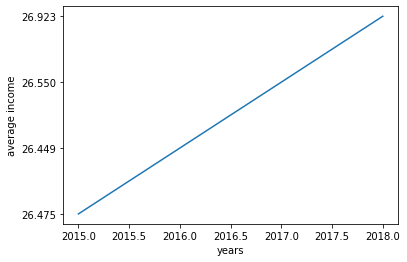

In [30]:
results("average income")

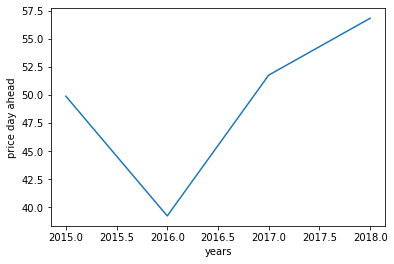

In [31]:
results("price day ahead")

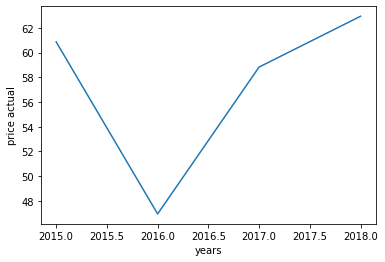

In [32]:
results("price actual")

In [33]:
results("uncertainty ahead")

year
2015    49.92+/-0.14
2016    39.25+/-0.15
2017    51.79+/-0.13
2018    56.86+/-0.14
Name: uncertainty ahead, dtype: object

In [34]:
results("uncertanty actual")

Please, insert a valid column name for 1st input:  uncertainty actual


year
2015    60.87+/-0.12
2016    46.95+/-0.16
2017    58.83+/-0.13
2018    62.94+/-0.12
Name: uncertainty actual, dtype: object

In [24]:
'''
def results(a,b=None):
    while a not in eco.columns:
        a=input("Please, insert a valid column name for 1st input: ")
    while b not in eco.columns:
        b=input("Please, insert a valid column name for 2nd input: ")
        
    print(eco[a],eco[b])
    
    if (a in eco.columns[0:3]) and (b in eco.columns[0:3]):
        #plt.plot(eco.index , eco[a] , eco.index , eco[b] )
        plt.plot(eco.index,eco[a], label="1st input")
        plt.plot(eco.index,eco[b], label="2nd input")
        plt.xlabel("years")
        return plt.show()
'''

        

Please, insert a valid column name for 2nd input:  price actual


year
2015    49.917352
2016    39.249886
2017    51.788470
2018    56.856050
Name: price day ahead, dtype: float64 year
2015    60.870320
2016    46.945583
2017    58.830708
2018    62.944292
Name: price actual, dtype: float64


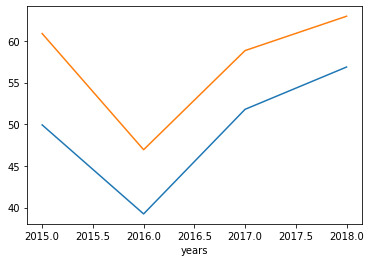

In [25]:
results('price day ahead')    